In [ ]:
import bloqade
from bloqade import squin
import numpy as np

from kirin.dialects.ilist import IList
import bloqade.types
from typing import Any
from kirin.types import Method

Register = IList[bloqade.types.Qubit, Any]




## Generating circuit kernels

What is `squin`. What is `kirin`. Reference for squin statements.

### Squin kernel statements

A direct option for writing a circuit is to do so with a squin kernel. Such a kernel is a python function decorated by `@squin.kernel`; you are able to include the following ``quantum operations" as statements and functions.

The first set of expressions are the familiar representations of quantum gates, measurements, and qubits. This is helped by a set of standard library functions under the `squin.gate` namespace

In [2]:
try: # As needed for kirin < 0.18
    del _gates
except:
    pass
@squin.kernel
def _gates():
    
    # Create n_qubits new qubits in a list
    qreg:IList[bloqade.types.Qubit, Any] = squin.qubit.new(3)
    
    # Measure a list of qubits and return the measurement results
    output:IList[bool,Any] = squin.qubit.measure(qreg)
    # Alternatively, measure a single qubit
    output_single:bool = squin.qubit.measure(qreg[0])
    
    # Gates are defined as standard library kernel functions, under `squin.gate` namespace.
    # The signature of these functions is to have the parameterized variables as the first inputs,
    # and the last variable be a qubit or list of qubits
    squin.gate.cx(qreg[0], qreg[1]) # A controlled-X gate, or CNOT
    squin.gate.cy(qreg[0], qreg[1]) # A controlled-Y gate
    squin.gate.cz(qreg[0], qreg[1]) # A controlled-Z gate
    squin.gate.ch(qreg[0], qreg[1]) # A controlled-Hadamard gate
    squin.gate.h(qreg[0]) # Hadamard gate, or H gate
    squin.gate.s(qreg[0]) # S gate, or phase gate
    squin.gate.s_adj(qreg[0]) # S-dagger gate, or conjugate phase gate
    squin.gate.t(qreg[0]) # T gate
    squin.gate.t_adj(qreg[0]) # Conjugate T gate
    squin.gate.x(qreg[0]) # Pauli-X gate, or NOT gate
    squin.gate.y(qreg[0]) # Pauli-Y gate
    squin.gate.z(qreg[0]) # Pauli-Z gate
    squin.gate.sqrt_x(qreg[0]) # Square root of Pauli-X gate X^0.5
    squin.gate.sqrt_x_adj(qreg[0]) # Square root of conjugate Pauli-X gate X^-0.5
    squin.gate.sqrt_y(qreg[0]) # Square root of Pauli-Y gate Y^0.5
    squin.gate.sqrt_y_adj(qreg[0]) # Square root of conjugate Pauli-Y gate Y^-0.5
    squin.gate.sqrt_z(qreg[0]) # Square root of Pauli-Z gate; alias for `squin.gate.s`
    squin.gate.sqrt_z_adj(qreg[0]) # Alias for `squin.gate.s_dag`
    squin.gate.rx(theta=0.1, qubit=qreg[0]) # Rotation around X axis by angle theta; exp(i*theta*X)
    squin.gate.ry(theta=0.1, qubit=qreg[0]) # Rotation around Y axis by angle theta; exp(i*theta*Y)
    squin.gate.rz(theta=0.1, qubit=qreg[0]) # Rotation around Z axis by angle theta; exp(i*theta*Z)
    squin.gate.u(theta=0.1, phi=0.2, lam=0.3, qubit=qreg[0]) # General single qubit rotation
    

You are also able to define your own custom gates using the `op` dialects. Operators are gates and other quantum operations decoupled from application from particular target qubits. Each `squin.gate` method is actually its own kernel which creates an operation and then applies it to a particular qubit. Separating the definition of operators from their application to qubits enables several conventient analysis techniques, such as identifying equivalent gates with common subexpression elimination. Note that operators do not necessarily have to be unitary, and can more widely represent objects such as observables and Hamiltonians.

In [3]:
# All expressed operators:

try: # As needed for kirin < 0.18
    del _operators
except:
    pass
@squin.kernel
def _operators():
    # Gates and operations are defined independently of qubits.
    # One must first define the operator, then apply it to qubits.
    # Directly building gates:
    cx = squin.op.cx() # A controlled-X gate
    cy = squin.op.cy() # A controlled-Y gate
    cz = squin.op.cz() # A controlled-Z gate
    ch = squin.op.ch() # A controlled-H gate
    h = squin.op.h() # A Hadamard gate
    s = squin.op.s() # An S gate
    t = squin.op.t() # A T gate
    X = squin.op.x() # The Pauli-X operator
    Y = squin.op.y() # The Pauli-Y operator
    Z = squin.op.z() # The Pauli-Z operator
    sqrt_X = squin.op.sqrt_x() # The square root of the Pauli-X operator e^i pi/2 X
    sqrt_Y = squin.op.sqrt_y() # The square root of the Pauli-Y operator e^i pi/2 Y
    sqrt_Z = squin.op.sqrt_z() # The square root of the Pauli-Z operator e^i pi/2 Z
    u = squin.op.u(theta=0.1, phi=0.2, lam=0.3) # An arbitrary single-qubit gate
    
    
    # Non-unitary operators:
    squin.op.p0() # Projector onto the |0> state
    squin.op.p1() # Projector onto the |1> state
    squin.op.spin_n() # The S- operator |0><1|
    squin.op.spin_p() # The S+ operator |1><0|
    squin.op.reset() # Reset a qubit to the |0> state
    squin.op.phase(theta=0.1) # Add a global phase to the qubits
    # Transforming gates into new operators:
    squin.op.control(X,n_controls=2) # An X gate conditional on 2 qubits, aka a Toffoli gate
    squin.op.rot(axis=X, angle=0.5) # A rotation around the X axis by 0.5 radians
    squin.op.adjoint(t) # The inverse of a gate
    
    # Operators that are not unitaries to represent Paulis
    squin.op.scale(op=X, factor=0.1) # Scale an operator by some factor, eg 0.1*X
    squin.op.kron(lhs=X,rhs=Y) # The Kroneker product of two operators to act on multiple qubits, eg X ⊗ Y
    squin.op.mult # Is this necessary?
    squin.op.identity # The identity operator, which does nothing
    squin.op.pauli_string(string="XXYZ") # A simpler alias for squin.op.kron(squin.op.X(), ...)


For example, lets make some operators and gates that go beyond the basic operators. More complicated functinalities, such as T state teleportation, should not rely on using these standard library utility functions in favor of you explicitly creating the operators and applying them.

In [4]:
try:
    del controlled_t
except:
    pass
try:
    del heisenberg_rotation
except:
    pass
@squin.kernel
def controlled_t(qubits:IList[bloqade.types.Qubit, Any]):
    """
    A controlled T gate, aka a sqrt{CZ} gate.
    ---o---
       |
    ---T---
    """
    t = squin.op.t()
    ctrl = squin.op.control(t, n_controls=1)
    squin.qubit.apply(operator=ctrl, qubits=qubits)

controlled_t.print()

func.func controlled_t(!py.IList[!py.Qubit, !Any]) -> !py.NoneType {
  ^0(%controlled_t_self, %qubits):
  │    %t = squin.op.t() : !py.Op
  │ %ctrl = squin.op.control(op=%t){is_unitary=False : !py.bool, n_controls=1 : !py.int} : !py.Op
  │         squin.qubit.apply(operator=%ctrl, qubits=%qubits : !py.IList[!py.Qubit, !Any])
  │    %0 = func.const.none() : !py.NoneType
  │         func.return %0
} // func.func controlled_t


Finally, you can also define noise on qubits using the `squin.noise` namespace. Like `op`, `noise` operators are defined separately from their application to qubits

In [5]:
try:
    del _noise
except:
    pass
@squin.kernel
def _noise():

    X = squin.op.x()
    squin.noise.pauli_error(basis=X, p=0.1) # An X flip with probability 0.1
    loss = squin.noise.qubit_loss(p=0.1) # A qubit loss with probability 0.1
    squin.noise.depolarize(p=0.1) # Depolarizing channel https://quantumai.google/reference/python/cirq/DepolarizingChannel
    
    squin.noise.single_qubit_pauli_channel # ???
    squin.noise.two_qubit_pauli_channel # ???
    
    # Noise is applied to qubits in the same way as operators.
    qubit = squin.qubit.new(1)[0]
    squin.qubit.apply(operator=loss, qubits=[qubit])

## Using Bloqade kernels
A key feature of kernels is the ability to do complex control flow similar to how one might program python. For example, one can use a for loop to apply the same gate to multiple qubits to prepare a GHZ state.

A common pattern is to use factory functions that return bloqade kernels. This way, you can fix parameters (such as the number of qubits) pythonically without needing to introduce the variable directly into the kernel itself.

In [6]:
# Bell state prep.

def GHZ_state_factory(nqubits:int) -> Method:
    @squin.kernel
    def GHZ_state() -> IList[bloqade.types.Qubit, Any]:
        qubits = squin.qubit.new(nqubits)
        squin.gate.h(qubits[0])
        for i in range(nqubits):
            squin.gate.cx(qubits[i], qubits[i+1])
        
        return qubits
    return GHZ_state
kernel = GHZ_state_factory(8)
kernel.print()

func.func GHZ_state() -> !py.IList[!py.Qubit, Literal(8,int)] {
  ^0(%GHZ_state_self):
  │                   %0 = py.constant.constant 8 : !py.int
  │              %qubits = squin.qubit.new(n_qubits=%0) : !py.IList[!py.Qubit, Literal(8,int)]
  │                   %1 = py.constant.constant 0 : !py.int
  │                   %2 = py.indexing.getitem(%qubits, %1) : !py.Qubit
  │                   %3 = func.invoke h(%2) : !py.NoneType maybe_pure=False
  │                   %4 = py.constant.constant IList(range(0, 8)) : !py.IList[!py.int, Literal(8,int)]
  │ %qubits_1, %qubits_2 = scf.for %i : !py.int in %4 -> !py.IList[!py.Qubit, Literal(8,int)], !py.IList[!py.Qubit, Literal(8,int)]
  │                        │ iter_args(%qubits_3 : !py.IList[!py.Qubit, Literal(8,int)] = %qubits, %qubits_4 : !py.IList[!py.Qubit, Literal(8,int)] = %qubits) {
  │                        │ %5 = py.indexing.getitem(%qubits_3 : !py.IList[!py.Qubit, Literal(8,int)], %i : !py.int) : !py.Qubit
  │                   

Alternatively, kernels could be parameterized; for example, we could write the same GHZ state preparation, except it prepares a variable number of qubits that is not declared until the kernel is run:

In [7]:
try:
    del GHZ_state
except:
    pass
@squin.kernel
def GHZ_state(nqubits:int) -> Register:
    qubits = squin.qubit.new(nqubits)
    squin.gate.h(qubits[0])
    for i in range(nqubits-1):
        squin.gate.cx(qubits[i], qubits[i+1])
    return qubits
 
GHZ_state.print()

func.func GHZ_state(!py.int) -> !py.IList[!py.Qubit, !Any] {
  ^0(%GHZ_state_self, %nqubits):
  │              %qubits = squin.qubit.new(n_qubits=%nqubits : !py.int) : !py.IList[!py.Qubit, !Any]
  │                   %0 = py.constant.constant 0 : !py.int
  │                   %1 = py.indexing.getitem(%qubits, %0) : !py.Qubit
  │                   %2 = func.invoke h(%1) : !py.NoneType maybe_pure=False
  │                   %3 = py.constant.constant 0 : !py.int
  │                   %4 = py.constant.constant 1 : !py.int
  │                   %5 = py.binop.sub(%nqubits : !py.int, %4) : !py.int
  │                   %6 = py.constant.constant 1 : !py.int
  │                   %7 = py.ilist.range(start=%3, stop=%5, step=%6) : !py.IList[!py.int, !Any]
  │ %qubits_1, %qubits_2 = scf.for %i : !py.int in %7 -> !py.IList[!py.Qubit, !Any], !py.IList[!py.Qubit, !Any]
  │                        │ iter_args(%qubits_3 : !py.IList[!py.Qubit, !Any] = %qubits, %qubits_4 : !py.IList[!py.Qubit, !Any] = %qu

### Option B: Building circuits in Cirq and other SDKs
The other option is to build circuits using cirq or other SDKs, and then lower them to and from bloqade kernels. This has the advantage of being able to leverage the excellent and in-depth resources of transpilation and circuit optimization without having to reinvent the wheel. However, for certain programs, such as those requiring more complex mid-circuit feed-forward, it is still required to write bloqade kernels as there is no adequite representation in other SDKs.

Let us begin by writing a simple GHZ state preparation circuit, in analogy to the bloqade kernel above.

In [8]:
import cirq

def ghz_prep(nqubits:int)-> cirq.Circuit:
    """
    Builder function that returns a simple N-qubit
    GHZ state preparation circuit
    """
    qubits = cirq.LineQubit.range(nqubits)
    output = cirq.Circuit()
    output.append(cirq.H(qubits[0]))
    for i in range(nqubits-1):
        output.append(cirq.CX(qubits[i],qubits[i+1]))
    return output
print(ghz_prep(4))

0: ───H───@───────────
          │
1: ───────X───@───────
              │
2: ───────────X───@───
                  │
3: ───────────────X───


The cirq circuit can be converted to a bloqade kernel with a transpilation function. The kernel can be considered as a transformation on the register of qubits it is applied to as arguments, with the return being the qubits that still persist.

The resulting circuit looks a little different because it requires invoking subkernels, which are represented as cirq `CircuitOperation`. To flatten the circuit, use an existing cirq transformation such as `cirq.expand_composite`.

In [9]:
# Load a cirq circuit into squin
kernel = squin.cirq.load_circuit(ghz_prep(4),
                                 kernel_name="ghz_prep_cirq", # Define the name of the kernel as if one were using @squin.kernel on a function
                                 register_as_argument=True, # If the resulting kernel should take in a qubit register (True) or make a new one (False)
                                 return_register=True) # If the resulting kernel should return the register of the qubits it acts on.
# Then, we can convert the circuit back to cirq.
# Not that this is NOT POSSIBLE in a general case due to the fact that
# cirq cannot represent complex control flow.

# The kernel must be first wrapped to have no arguments, as
# cirq circuits are static representations. It is up to you,
# the user, to figure out the number of qubits in this wrapper...

try:
    del ghz_prep_cirq_wrapper
except:
    pass
@squin.kernel
def ghz_prep_cirq_wrapper() -> IList[bloqade.types.Qubit, Any]:
    """
    A wrapper for the ghz_prep_cirq kernel that takes no arguments.
    """
    qubits = squin.qubit.new(8)
    return kernel(qubits)

# Convert that circuit back to cirq.
circuit2:cirq.Circuit = squin.cirq.emit_circuit(ghz_prep_cirq_wrapper, ignore_returns=True)
print(circuit2)


      [ 0: ───H───@─────────── ]
      [           │            ]
      [ 1: ───────X───@─────── ]
0: ───[               │        ]───────────────
      [ 2: ───────────X───@─── ]
      [                   │    ]
      [ 3: ───────────────X─── ](no_rep_ids)
      │
1: ───#2───────────────────────────────────────
      │
2: ───#3───────────────────────────────────────
      │
3: ───#4───────────────────────────────────────


The circuit loading also works with classical feed forward, though it is in general more difficult to generally extract out a cirq circuit from a generic feedforward cirq kernel. For example, the T teleportation gadget can be written and loaded as

In [10]:
reg = cirq.LineQubit.range(2)
circuit = cirq.Circuit()
circuit.append(cirq.T(reg[0]))
circuit.append(cirq.CNOT(reg[1],reg[0]))
circuit.append(cirq.measure(reg[0], key="m"))
circuit.append(cirq.S(reg[1]).with_classical_controls("m"))
print(circuit)
kernel = squin.cirq.load_circuit(circuit,
                                 kernel_name="teleport",
                                 register_as_argument=True,
                                 return_register=True)
kernel.print()

0: ───T───X───M───────
          │   ║
1: ───────@───╫───S───
              ║   ║
m: ═══════════@═══^═══
func.func teleport(!py.IList[!py.Qubit, !Any]) -> !py.IList[!py.Qubit, !Any] {
  ^0(%teleport_self, %q):
  │  %0 = squin.op.t() : !py.Op
  │  %1 = py.constant.constant 0 : !py.int
  │  %2 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %1) : !Any
  │  %3 = py.ilist.new(values=(%2)){elem_type=!py.Qubit} : !py.IList[!py.Qubit, Literal(1,int)]
  │       squin.qubit.apply(operator=%0, qubits=%3)
  │  %4 = squin.op.x() : !py.Op
  │  %5 = squin.op.control(op=%4){is_unitary=False : !py.bool, n_controls=1 : !py.int} : !py.Op
  │  %6 = py.constant.constant 1 : !py.int
  │  %7 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %6) : !Any
  │  %8 = py.constant.constant 0 : !py.int
  │  %9 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %8) : !Any
  │ %10 = py.ilist.new(values=(%7, %9)){elem_type=!py.Qubit} : !py.IList[!py.Qubit, Literal(2,int)]
  │       squin.qubit.apply(ope

Due to the difficulty of representing mid-circuit control flow in cirq, attempting to lower these kernels back to cirq will result in an error

In [11]:
try:
    del t_teleport_noargs
except:
    pass
@squin.kernel
def t_teleport_noargs():
    """
    A simple T teleportation circuit that requires mid circuit control flow.
    """
    ancilla = squin.qubit.new(1)[0]
    target = squin.qubit.new(1)[0]
    squin.gate.t(ancilla)
    squin.gate.cx(target, ancilla)
    if squin.qubit.measure(target):
        squin.gate.s(ancilla)
try:
    squin.cirq.emit_circuit(t_teleport_noargs)
except Exception as e:
    print("ERROR:",e)

# Though measurement without feedforward is possible
try:
    del coinflip
except:
    pass
@squin.kernel
def coinflip():
    qubit = squin.qubit.new(1)[0]
    squin.gate.h(qubit)
    bits = squin.qubit.measure(qubit)
    return bits
circuit = squin.cirq.emit_circuit(coinflip, ignore_returns=True)
print(circuit)


0: ───[ 0: ───H─── ](no_rep_ids)───M───


## Simulation, emulation, and analysis

We can simulate the action of kernels using concrete interpreters. There are three kinds of interpreters that we can consider to execute kernels:
- **Hardware** interpreter: runs the circuit through the entire compiler stack, makes actual executions on real hardware, and analyzes those measurements. This interpreter is not available at this time.
- **Emulation** interpreter: A faithful emulation of hardware execution, made on either noisy or noiseless hardware. Kernels can be interchangably run on hardware and emulation interpreters.
- **Simulation** interpreter: A superset of an emulation interpreter, a simulation interpreter can also provide hidden information about the quantum state, enabling the user to do analysis that is impossible to do on real hardware; for example, computing the fidelity or overlap of some wavefunction, computing exact probability distributions, or computing exact expectation values of observables.

[ TO DO: Clean up! ]

In [12]:
from bloqade.pyqrack import StackMemorySimulator, DynamicMemorySimulator
# StackMemorySimulator - static number of qubits
# DynamicMemorySimulator - dynamic number of qubits, but slower. Use if you don't know how many qubits you need in advance.
emulator = StackMemorySimulator(min_qubits=8)

task = emulator.task(GHZ_state, args=(4,))
results = task.run()
# The results is the same ResultType as the kernel return.
# In this case, it is a list of qubits.
print(results)


IList([PyQrackQubit(addr=0, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x13dbf6860>, state=<QubitState.Active: 1>), PyQrackQubit(addr=1, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x13dbf6860>, state=<QubitState.Active: 1>), PyQrackQubit(addr=2, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x13dbf6860>, state=<QubitState.Active: 1>), PyQrackQubit(addr=3, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x13dbf6860>, state=<QubitState.Active: 1>)])


PyQRack is mainly intended as an *emulator*, where it is a bit more difficult to extract out non-physical values such as exact probability distributions or the state vector. However, the qubits of the emulator do point to the state of the emulator via the `qubit.sim_reg` attribute. This enables the user, through the PyQRack API, to extract out nonphysical quantities such as the wavefunction or compute expectation values.

In [13]:
from bloqade.pyqrack import PyQrackQubit
# This kernel returns a list of Qubit objects. We can use these to analyze the
# quantum state of the register.
results:list[PyQrackQubit] = task.run()

# Computing expectation values is done via a representation of the Pauli string.
zz_expectation = emulator.pauli_expectation([results[0], results[1]],"ZZ")
# The state is represented as a reduced density matrix.
# This is done because the RDM may ask for any subsystem, and if that
# subsystem is entangled with other qubits, the state is mixed.
state = emulator.reduced_density_matrix_eigh(results)

# Note that the RDM is represented in its eigenbasis for efficiency.
# If the state is pure, there is only one nonzero eigenvalue. This is the case for the GHZ state.
print("A pure state has only a single eigenvalue [1] of the RDM:",state.eigenvalues)
statevector = state.eigenvectors[:,0]
print("The statevector of the GHZ state looks like [1, 0, 0, ..., 0, 1]")
print(statevector)

# If the kernel does not return the qubit register, one can still collect it. Note that it
# is now the onus of you, the user, to determine which qubits are which.
# Qubits are typically added sequentially, so if you make multiple registers, the qubits
# will be in the order they were added.
qubits:list[PyQrackQubit] = task.qubits()

AttributeError: 'str' object has no attribute 'sim_reg'

In [ ]:
# Further state analysis pending #https://github.com/QuEraComputing/bloqade-circuit/issues/447

If the output is randomized, one can average over many runs

In [ ]:
from bloqade.pyqrack.task import PyQrackSimulatorTask
from bloqade.pyqrack.device import PyQrackSimulatorBase
import numpy as np
from typing import Any
from collections import Counter


"""
Boilerplate that should be a method of PyQrackSimulatorTask.
"""
def multirun(task:PyQrackSimulatorTask,nshots:int, return_state:bool=False)-> dict[Any, float] | tuple[dict[Any, float], np.linalg._linalg.EighResult]:
    
    rho = None
    results = []
    for _ in range(nshots):
        result = task.run()
        results.append(result)
        if return_state:
            rho_single = PyQrackSimulatorBase.reduced_density_matrix_eigh(task.qubits())
            if rho is None:
                rho = rho_single
            else:
                rho = np.linalg._linalg.EighResult( # This is the + operation.
                    eigenvalues = np.concatenate((rho.eigenvalues, rho_single.eigenvalues)),
                    eigenvectors = np.concatenate((rho.eigenvectors, rho_single.eigenvectors), axis=1))
    
    # Convert ilist to tuple so that it is hashable by Counter https://github.com/QuEraComputing/bloqade-circuit/issues/428
    def convert(data):
        if isinstance(data, (list,IList)):
            return tuple(convert(item) for item in data)
        return data
    results = convert(results)
    
    data = {key: value/len(results) for key, value in Counter(results).items()} # Normalize to probabilities
    
    if return_state:
        # Canonicalize the density matrix
        rho = np.linalg._linalg.EighResult(
            eigenvalues = rho.eigenvalues / np.sum(rho.eigenvalues),
            eigenvectors = rho.eigenvectors)
        return data, rho
    else:
        return data

In [14]:
# Define a kernel that randomly measures 1 or 0 with 50% probability each.
try:
    del coinflip
except:
    pass
@squin.kernel
def coinflip()-> list[bool]:
    qubit = squin.qubit.new(2)
    squin.gate.h(qubit[0])
    return squin.qubit.measure(qubit)

# Define the emulator and task
emulator = StackMemorySimulator()
task = emulator.task(coinflip)
results, rho = multirun(task, nshots=1000, return_state=True)

NameError: name 'multirun' is not defined

# Composition of kernels

The powerful thing about bloqade kernels is that they allow all of the typical syntax of for loops, if-else statements, function calls, and other powerful abstractions.

In [15]:
def trotter_layer(qubits:list[cirq.Qid], dt:float = 0.01, J:float = 1, h:float = 1)-> cirq.Circuit:
    """
    Cirq builder function that returns a circuit of
    a Trotter step of the 1D transverse Ising model
    """
    op_zz = cirq.ZZ**(dt * J/np.pi)
    op_x = cirq.X**(dt * h/np.pi)
    circuit = cirq.Circuit()
    for i in range(0,len(qubits)-1,2):
        circuit.append(op_zz.on(qubits[i], qubits[i + 1]))
    for i in range(1,len(qubits)-1,2):
        circuit.append(op_zz.on(qubits[i], qubits[i + 1]))
    for i in range(0, len(qubits)):
        circuit.append(op_x.on(qubits[i]))
    return circuit


In [ ]:
# Option A: write the entire circuit directly, then convert it to a kernel
def trotter_circuit(qubits:list[cirq.Qid], steps:int = 10, dt:float = 0.01, J:float = 1, h:float = 1)-> cirq.Circuit:
    circuit = cirq.Circuit()
    for _ in range(steps):
        circuit += trotter_layer(qubits, dt, J, h)
    return circuit

bloqade_trotter_circuit = squin.cirq.load_circuit(
            trotter_circuit(
            qubits=cirq.LineQubit.range(8),
            steps=10,
            dt=0.01,
            J=1,
            h=1),
        kernel_name="trotter",
        register_as_argument=True,
        return_register=True)



In [18]:
# Option B: use a builder function to create the circuit.
def factory_trotter(N:int):
    bloqade_trotter_layer = squin.cirq.load_circuit(
                trotter_circuit(
                qubits=cirq.LineQubit.range(N),
                steps=1, # A single trotter layer
                dt=0.01,
                J=1,
                h=1),
            kernel_name="trotter",
            register_as_argument=True,
            return_register=True)

    @squin.kernel
    def trotter_for_loop(steps:int):
        """
        Main function that runs the Trotter circuit for a given number of steps
        """
        qubits = squin.qubit.new(N)
        for _ in range(steps):
            qubits = bloqade_trotter_layer(qubits)
    
    return trotter_for_loop


In [19]:
# Option C: write it all in bloqade directly
try:
    del bloqade_trotter
except:
    pass

# Define an operator that looks like the ZZ power gate
@squin.kernel
def op_zz(theta: float, qb1:bloqade.types.Qubit, qb2:bloqade.types.Qubit):
    """
    A kernel that returns an operator that looks like ZZ^{theta/2pi}
    """
    squin.gate.cx(qb1, qb2)
    squin.gate.rz(theta, qb2)
    squin.gate.cx(qb1, qb2)
    
    
@squin.kernel
def bloqade_trotter(qubits:IList[bloqade.types.Qubit, Any],
                    steps:int,
                    dt:float = 0.01,
                    J:float = 1,
                    h:float = 1):
    """
    Main function that runs the Trotter circuit for a given number of steps
    """
    xpow = squin.op.rot(squin.op.x(), angle=dt * h)
    for _ in range(steps):
        for i in range(0, len(qubits)-1):
            op_zz(theta = dt*J, qb1 = qubits[i], qb2 = qubits[i + 1])
        for i in range(0, len(qubits)):
            squin.qubit.apply(operator=xpow, qubits=[qubits[i]])

# Wrap the kernel to create the qubits and then prepare the Trotterized time evolved state
try:
    del main_trotter
except:
    pass
@squin.kernel
def main_trotter(N:int,
                 steps:int,
                 dt:float = 0.01,
                 J:float = 1,
                 h:float = 1):
    qubits = squin.qubit.new(N)
    bloqade_trotter(qubits, steps, dt, J, h)
    return qubits

[ Differentiate writing circuits in bloqade kernels (parameterized) vs as circuits (static) ]

In [26]:
# Option A: Cirq only
cirq_trotter = trotter_circuit(
    qubits=cirq.LineQubit.range(8),
    steps=10,
    dt=0.01,
    J=1,
    h=1)
cirq_statevector = cirq.Simulator().simulate(cirq_trotter).state_vector()

# Or converting to a bloqade kernel and simulating with PyQrack
cirq_trotter_kernel = squin.cirq.load_circuit(
    cirq_trotter,
    kernel_name="cirq_trotter",
    register_as_argument=False,
    return_register=True)
cirq_trotter_qubits = StackMemorySimulator(min_qubits=8).run(cirq_trotter_kernel)
cirq_bloqade_state = StackMemorySimulator.reduced_density_matrix_eigh(cirq_trotter_qubits)
# The state is, of course, the same. A little bit of work is needed to extract out the (single) state vector from the RDM.
print("Overlap:", np.abs(np.dot(cirq_statevector, cirq_bloqade_state.eigenvectors[:,0]))**2)


AttributeError: type object 'StackMemorySimulator' has no attribute 'reduced_density_matrix_eigh'

Observe that for option C, the kernel is not bound to the particular values of the number of qubits, number of timesteps, and so forth, until runtime.

In [27]:
# Option C: Bloqade only
cirq_trotter_qubits = StackMemorySimulator(min_qubits=8).run(main_trotter, args=(8,10,0.1,1,1))
cirq_bloqade_state = StackMemorySimulator.reduced_density_matrix_eigh(cirq_trotter_qubits)
print("Overlap:", np.abs(np.dot(cirq_statevector, cirq_bloqade_state.eigenvectors[:,0]))**2)

AttributeError: type object 'StackMemorySimulator' has no attribute 'reduced_density_matrix_eigh'

# Mid-circuit feed forward

In [ ]:
# 1. Single-bit-decision for T state teleportation in bloqade
try:
    del t_teleport
except:
    pass
@squin.kernel
def t_teleport(target:IList[squin.qubit.Qubit, Any]) -> IList[squin.qubit.Qubit, Any]:
    ancilla = squin.qubit.new(1)[0]
    squin.gate.h(ancilla)
    squin.gate.t(ancilla)
    squin.gate.cx(control=target[0], target=ancilla)
    bit = squin.qubit.measure(target)
    if bit == 1:
        squin.gate.s(ancilla)
    return [ancilla]


# And now lets wrap it into a larger context and run it
# https://github.com/QuEraComputing/bloqade-circuit/issues/431
try:
    del t_teleport_wrapper
except:
    pass
@squin.kernel
def t_teleport_wrapper()-> squin.qubit.Qubit:
    
    target = squin.qubit.new(1)
    squin.gate.h(target[0])
    target = t_teleport(target)[0]
    return target
# And run it
emulator = StackMemorySimulator(min_qubits=2)
task = emulator.task(t_teleport_wrapper)
results, state = multirun(task, nshots=1000, return_state=True)
# The result is a dictionary, so one must extract the ancilla qubit...
ancilla = list(results.keys())[0]  # Assuming the only key is the ancilla qubit
state_ancilla = state.rdm([ancilla]) # Project just onto the subspace of the ancilla qubit.
# Even though there is measurement and feedforward, the final state is still pure. Neat!
print(state_ancilla)

### Constant depth GHZ state

Remarkably, it is also possible to prepare a GHZ state with a constant number of gates. At first glance this seems impossile: quantum information can only propigate as fast as the information lightcone, and so a constant depth circuit can only have a small amount of entanglement-- not enough to prepare the longrange correlated GHZ state. The trick is, we can replace quantum gates with ancillas and classical feed-forward measurements, so that the information is propigated classically instead of quantumly. For more details, check out [1] and [2]

[1] [Efficient Long-Range Entanglement Using Dynamic Circuits](https://doi.org/10.1103/PRXQuantum.5.030339)

[2] [Constant-Depth Preparation of Matrix Product States with Adaptive Quantum Circuits](https://doi.org/10.1103/PRXQuantum.5.030344)

The explicit circuit for the GHZ circuit is shown below, as reproduced from Fig. 5 of [1]. Yellow $\oplus$ represent the XOR of the two input bits.

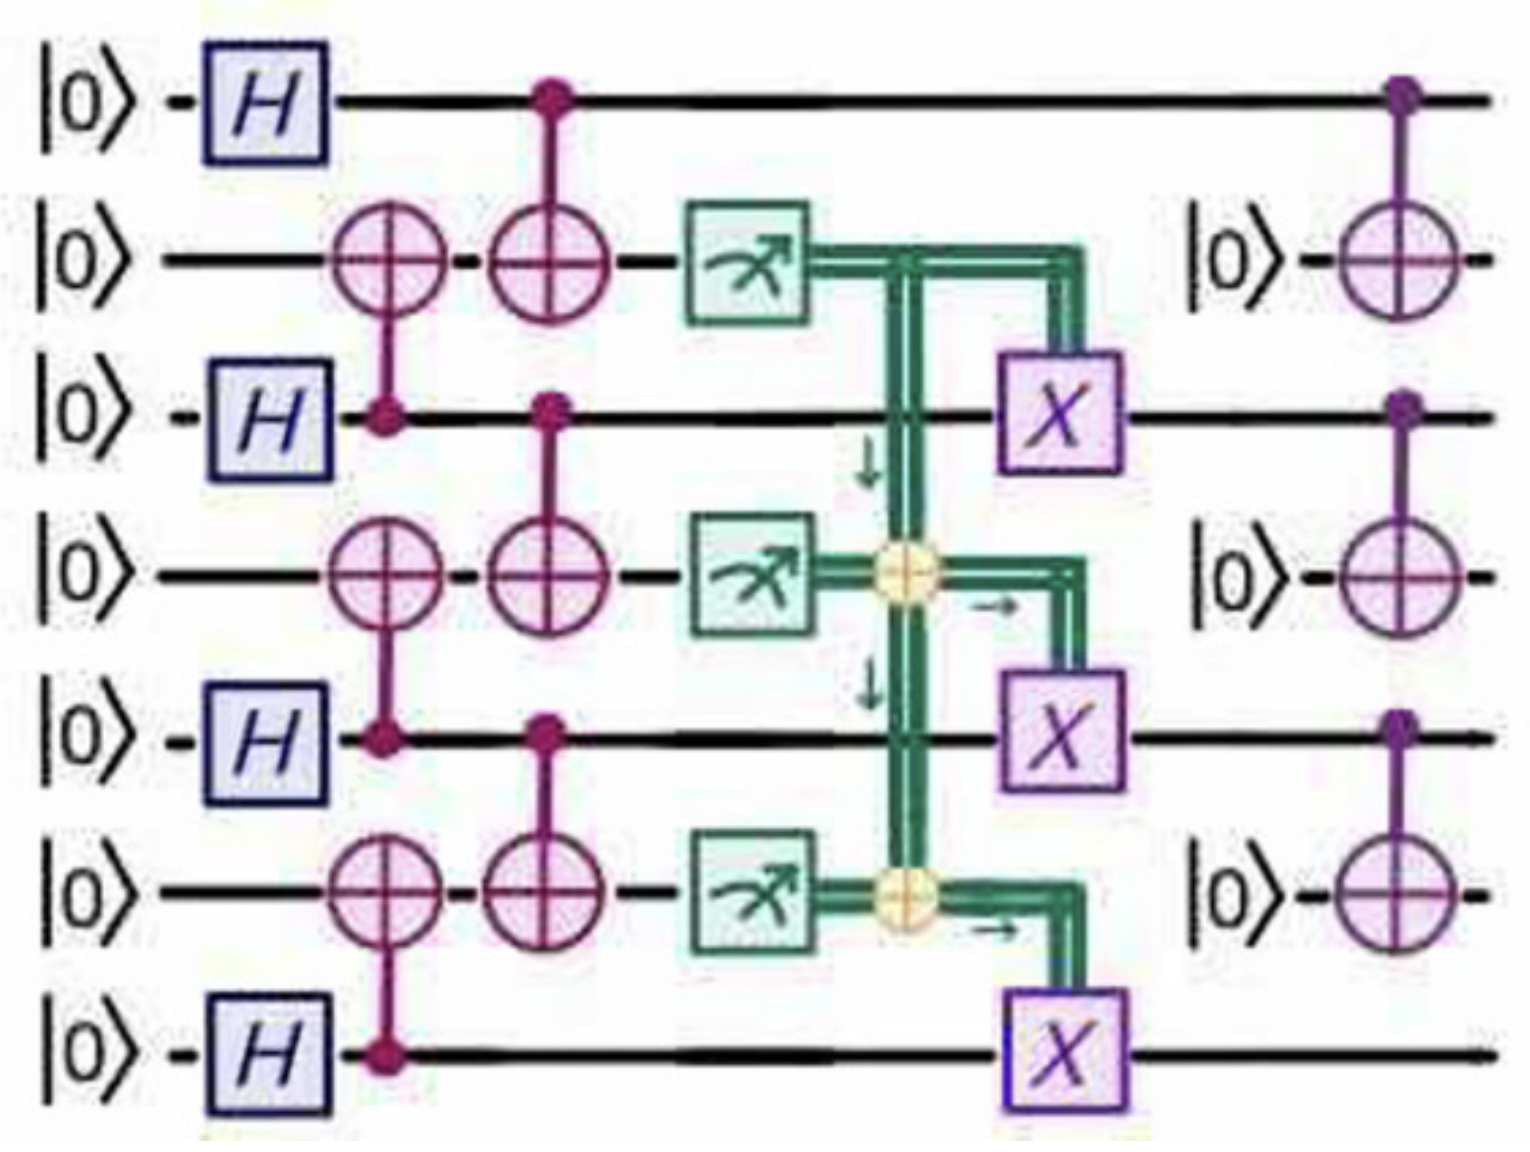

In [ ]:

def ghz_constant_depth(n_qubits: int):

    @squin.kernel
    def main() -> Register:
        qreg = squin.qubit.new(n_qubits)
        ancilla = squin.qubit.new(n_qubits - 1)
        h = squin.op.h()
        cx = squin.op.cx()
        x = squin.op.x()
        
        for i in range(n_qubits):
            squin.qubit.apply(h, qreg[i])
            
        for i in range(n_qubits-1):
            squin.qubit.apply(cx, [qreg[i], ancilla[i]])
        for i in range(n_qubits-1):
            squin.qubit.apply(cx, [qreg[i+1], ancilla[i]])
            
        parity:int = 0
        bits:list[bool] = squin.qubit.measure(ancilla)
        for i in range(n_qubits-1):
            parity = parity ^ bits[i]
            if parity == 1:
                squin.qubit.apply(x, qreg[i+1])
        return qreg
    
    return main


In [ ]:
# At this point, you know the drill. We can simulate this with multirun via PyQrack
emulator = StackMemorySimulator(min_qubits=4)
task = emulator.task(ghz_constant_depth(4))
ancilla, state = multirun(task, nshots=1000, return_state=True)
state = state.canonicalize()
# Even though there is measurement and feedforward, the final state is still a pure GHZ state. Neat!
print(state)

As a final note, consider how difficult it would be to represent this circuit in Cirq. In particular, there is a for loop, where inside the for loop there is an algibraic operation (XOR) that feeds forward onto a variable (parity). This circuit is inexpressible in Cirq without some serious hacking of ancilla qubit registers.